In [1]:
import pandas as pd
import numpy as np

# dataset
df = pd.read_csv("../intermedionormalizado.csv")

df.head()

,Puertas,Con cámara de retroceso,Kilómetros,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,...,Combustible_Nafta/GNC,Transmision_Automática,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática,Vendedor_concesionaria,Vendedor_particular,Vendedor_tienda,es_outlier,antiguedad
0,1,0,-0.034813,-0.371842,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,-0.125
1,1,1,-0.591819,1.487363,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,-0.625
2,1,0,-0.023499,0.281212,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.000
3,1,0,0.077441,-0.393315,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.250
4,1,1,0.356832,-0.042160,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,-0.250


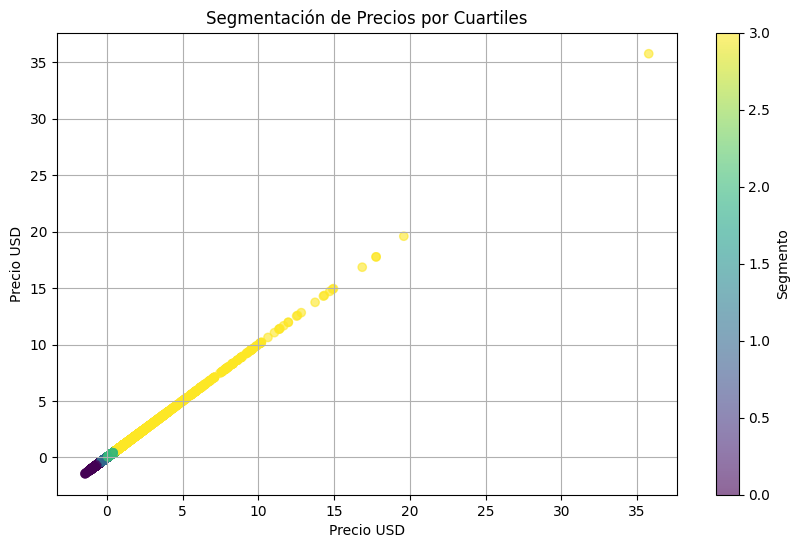

Cantidad por segmento:
segmento
0    4635
1    4497
2    4558
3    4564
Name: count, dtype: int64


In [2]:
import pandas as pd

# Crear columna de cuartil del precio normalizado
df['segmento'] = pd.qcut(df['Precio_usd'], q=4, labels=[0, 1, 2, 3])
df['segmento'] = df['segmento'].astype(int)

# grafico los precios en plano coloreados por segmentos 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Precio_usd'], df['Precio_usd'], c=df['segmento'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Segmento')
plt.xlabel('Precio USD')
plt.ylabel('Precio USD')
plt.title('Segmentación de Precios por Cuartiles')
plt.grid(True)
plt.show()

# Cantidad por cuartil
cantidad_por_segmento = df['segmento'].value_counts().sort_index()
print("Cantidad por segmento:")
print(cantidad_por_segmento)

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier

# 1. Preparar datos
X = df.drop(columns=['Precio_usd', 'segmento', 'es_outlier'])
y = df['segmento']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 2. Definir espacio de búsqueda
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# 3. Configurar búsqueda
mlp = MLPClassifier(max_iter=500, random_state=42)
grid = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# 4. Entrenar
grid.fit(X_train, y_train)

# 5. Resultados
print("✅ Mejores hiperparámetros:", grid.best_params_)
print("🎯 Accuracy en test:", grid.score(X_test, y_test))

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/matiaslein/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matiaslein/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matiaslein/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/matiaslein/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.wa

✅ Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant'}
🎯 Accuracy en test: 0.8234005258545136


In [4]:
# Usar el mejor modelo MLP ya entrenado
mlp_final = grid.best_estimator_

# Predecir el segmento para todo el dataset (sin usar precio)
X_full = df.drop(columns=['Precio_usd', 'segmento', 'es_outlier'])
df['segmento_predicho'] = mlp_final.predict(X_full)

df.head()

,Puertas,Con cámara de retroceso,Kilómetros,Precio_usd,Marca_Alfa Romeo,Marca_Audi,Marca_BAIC,Marca_BMW,Marca_Chery,Marca_Chevrolet,...,Transmision_Automática secuencial,Transmision_Manual,Transmision_Semiautomática,Vendedor_concesionaria,Vendedor_particular,Vendedor_tienda,es_outlier,antiguedad,segmento,segmento_predicho
0,1,0,-0.034813,-0.371842,0,0,0,0,0,0,...,0,1,0,1,0,0,0,-0.125,1,1
1,1,1,-0.591819,1.487363,0,0,0,0,0,0,...,1,0,0,0,0,1,1,-0.625,3,3
2,1,0,-0.023499,0.281212,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.000,2,2
3,1,0,0.077441,-0.393315,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.250,1,0
4,1,1,0.356832,-0.042160,0,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.250,1,2


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Para guardar modelos y métricas
modelos_rf = {}
resultados = []

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Entrenar un modelo por cada segmento predicho
for segmento in sorted(df['segmento_predicho'].unique()):
    print(f"\n🔍 Buscando mejores parámetros para segmento {segmento}...")

    df_segmento = df[df['segmento_predicho'] == segmento]
    X = df_segmento.drop(columns=['Precio_usd', 'segmento', 'es_outlier', 'segmento_predicho'])
    y = df_segmento['Precio_usd']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    rf = RandomForestRegressor(random_state=42)
    grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)

    best_rf = grid.best_estimator_
    modelos_rf[segmento] = best_rf

    y_pred = best_rf.predict(X_test)
    resultados.append({
        'segmento': segmento,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'mejores_params': grid.best_params_
    })

# Mostrar resultados en DataFrame
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


🔍 Buscando mejores parámetros para segmento 0...

🔍 Buscando mejores parámetros para segmento 1...

🔍 Buscando mejores parámetros para segmento 2...

🔍 Buscando mejores parámetros para segmento 3...
   segmento       MAE      RMSE        R2  \
0         0  0.081207  0.118678  0.539610   
1         1  0.093763  0.139726  0.420555   
2         2  0.174993  0.540647  0.077397   
3         3  0.354218  0.687261  0.834522   

                                      mejores_params  
0  {'max_depth': None, 'max_features': 'sqrt', 'm...  
1  {'max_depth': None, 'max_features': 'sqrt', 'm...  
2  {'max_depth': None, 'max_features': 'sqrt', 'm...  
3  {'max_depth': None, 'max_features': 'sqrt', 'm...  


In [6]:
import pandas as pd
resultados_df = pd.DataFrame(resultados)
print(resultados_df.sort_values('segmento'))


   segmento       MAE      RMSE        R2  \
0         0  0.081207  0.118678  0.539610   
1         1  0.093763  0.139726  0.420555   
2         2  0.174993  0.540647  0.077397   
3         3  0.354218  0.687261  0.834522   

                                      mejores_params  
0  {'max_depth': None, 'max_features': 'sqrt', 'm...  
1  {'max_depth': None, 'max_features': 'sqrt', 'm...  
2  {'max_depth': None, 'max_features': 'sqrt', 'm...  
3  {'max_depth': None, 'max_features': 'sqrt', 'm...  
